##INTRODUCTION TO REGRESSION WITH NEURAL NETWORKS IN TENSORFLOW

In [ ]:
# Importing TensorFlow
import tensorflow as tf
print(tf.__version__)

2.8.2


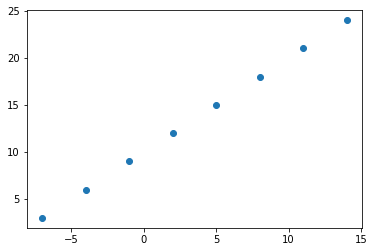

In [ ]:
# Creating data to view and fit
import numpy as np
import matplotlib.pyplot as plt

# Creating Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Creating Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualizing It
plt.scatter(X, y)


In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

##INPUT AND OUTPUT SHAPES

In [ ]:
# Creating a demo Tensor for our Housing Price Prediction Problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn Our Numpy Arrays into Tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape= y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## STEPS IN MODELLING WITH TENSORFLOW

MODEL 1

In [ ]:
# SETTING A RANDOM SEED
tf.random.set_seed(42)

# 1. Creating A Model using the Sequential API
model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                           
])

# 2. Compiling The Model
model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting The Model
model1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 270ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# 4. Prediction
model1.predict([17.0])

array([[12.716021]], dtype=float32)

## IMPROVING OUR MODEL

MODEL 2

In [ ]:
# 1. Creating The Model
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                           
])

# 2. Compiling The Model
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting The Model
model2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 442ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0

In [ ]:
# 4. Prediction
model2.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
model1.predict([17.0])

array([[12.716021]], dtype=float32)

MODEL 3 (Extra Hidden Layers With 100 Hidden Units)

In [ ]:
# 1. Creating The Model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),                          
  tf.keras.layers.Dense(1)
])

# 2. Compiling The Model
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# 3. Fitting The Model
model3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 611ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 21ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 14m

In [ ]:
# 4. Prediction
model3.predict([17.0])

array([[31.223137]], dtype=float32)

In [ ]:
model2.predict([17.0])

array([[29.739855]], dtype=float32)

MODEL 4

In [ ]:
# 1. Creating The Model
model4 = tf.keras.Sequential([
  tf.keras.layers.Dense(50),                          
  tf.keras.layers.Dense(1)
])

# 2. Compiling The Model
model4.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(lr=0.01),
               metrics=['mae'])

# 3. Fitting The Model
model4.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 355ms/step - loss: 14.2261 - mae: 14.2261
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.5328 - mae: 13.5328
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8450 - mae: 12.8450
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1611 - mae: 12.1611
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 11.4786 - mae: 11.4786
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7953 - mae: 10.7953
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.1084 - mae: 10.1084
Epoch 8/100
1/1 [==============================] - 0s 19ms/step - loss: 9.4153 - mae: 9.4153
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7133 - mae: 8.7133
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9998 - mae: 7.9998
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - los

In [ ]:
# 4. Prediction
model4.predict([17.0])

array([[27.13847]], dtype=float32)

##EVALUATING A MODEL PERFORMANCE

VISUALIZE, VISUALIZE, VISUALIZE

In [ ]:
# Making A Bigger Dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Making Labels For The Dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

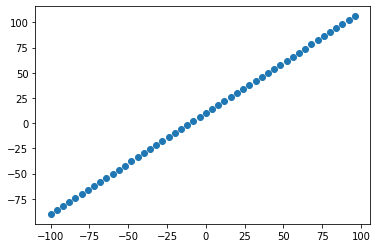

In [ ]:
# Visualize The Data
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [ ]:
# Checking The Length Of Samples We Have
len(X)

50

In [ ]:
# Splitting The Data Into Train And Test Data
X_train = X[:40] # First 40 as training samples
y_train = y[:40]


X_test = X[40:] # Last 10 as testing data
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

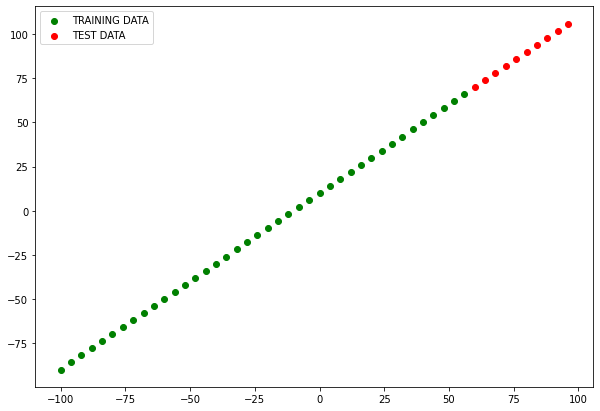

In [ ]:
plt.figure(figsize=(10, 7))
# Plot Training Data In Blue
plt.scatter(X_train, y_train, c='g', label='TRAINING DATA')
# Plot Test Data In Red
plt.scatter(X_test, y_test, c='r', label='TEST DATA')
# Show A Legend
plt.legend()

BUILDING A NEURAL NETWORK

In [ ]:
# 1. Creating A Model
model = tf.keras.Sequential([
   tf.keras.layers.Dense(10, input_shape=[1]),
   tf.keras.layers.Dense(1)                     
])

# 2. Compiling The Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fitting The Model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Getting A Summary Of The Model
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 10)                20        
                                                                 
 dense_30 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


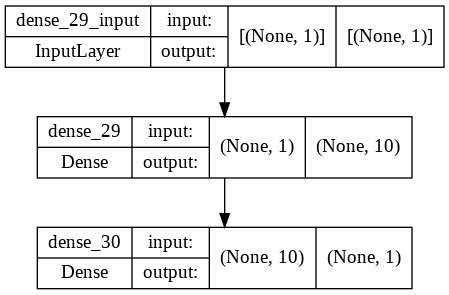

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

VISUALIZING OUR MODEL'S PREDICTIONS

In [ ]:
# 4. PREDICTIONS
y_pred = model.predict(X_test)
y_pred

array([[ 78.34435 ],
       [ 83.45103 ],
       [ 88.55772 ],
       [ 93.66438 ],
       [ 98.77106 ],
       [103.87774 ],
       [108.98442 ],
       [114.091095],
       [119.19778 ],
       [124.30445 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

##CREATING: A PLOTTING FUNCTION

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  PLOTS TRAINING DATA, TEST DATA AND COMPARES PREDICTIONS TO GROUND TRUTH LABELS
  """

  plt.figure(figsize=(10,7))
  # Plotting Training Data In Blue
  plt.scatter(train_data, train_labels, c='b', label='TRAINING DATA')
  # Plotting Testing Data In Green
  plt.scatter(test_data, test_labels, c='g', label='TEST DATA')
  # Plotting Model's Predictions In Red
  plt.scatter(test_data, predictions, c='r', label='PREDICTIONS')
  # Show The Legend
  plt.legend();



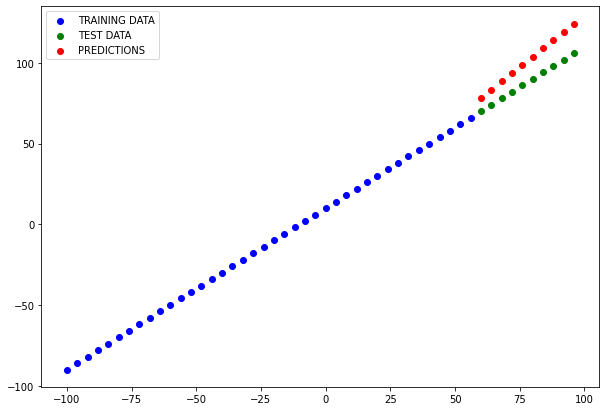

In [ ]:
plot_predictions()

EVALUATING OUR MODEL'S PREDICTIONS WITH REGRESSION EVALUATION METRICS

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 252ms/step - loss: 13.3244 - mae: 13.3244


[13.32440185546875, 13.32440185546875]

In [ ]:
# Calculating The Mean Absolute Error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.262259, 10.509794, 10.      , 10.732877, 12.862635, 16.30219 ,
       20.98442 , 26.091095, 31.197779, 36.30445 ], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred

array([[ 78.34435 ],
       [ 83.45103 ],
       [ 88.55772 ],
       [ 93.66438 ],
       [ 98.77106 ],
       [103.87774 ],
       [108.98442 ],
       [114.091095],
       [119.19778 ],
       [124.30445 ]], dtype=float32)

In [ ]:
y_pred = tf.constant(y_pred)
y_pred

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 78.34435 ],
       [ 83.45103 ],
       [ 88.55772 ],
       [ 93.66438 ],
       [ 98.77106 ],
       [103.87774 ],
       [108.98442 ],
       [114.091095],
       [119.19778 ],
       [124.30445 ]], dtype=float32)>

In [ ]:
# Calculating The Mean Absolute Error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.324402>

In [ ]:
# Calculating The Mean Squared Error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=187.64375>

##MAKING FUNCTIONS TO REUSE MAE AND MSE

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## RUNNING EXPERIMENTS TO IMPROVE OUR MODEL

MODEL A

In [ ]:
# Setting The Random Seed
tf.random.set_seed(42)

# 1. Creating The Model
modelA = tf.keras.Sequential([
    tf.keras.layers.Dense(1)                          
])

# 2. Compiling The Model
modelA.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# 3. Fitting The Model
modelA.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - 

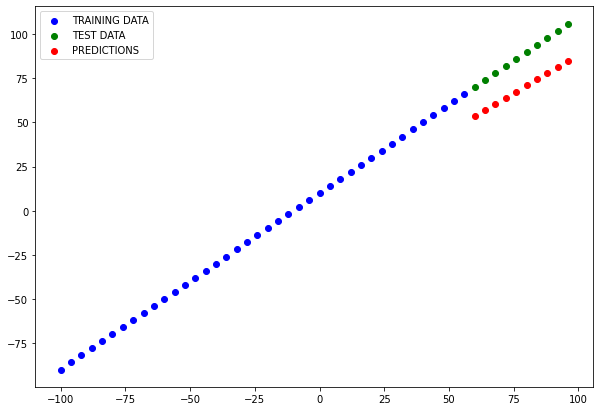

In [ ]:
# Make And Plot Our Predictions
y_predA = modelA.predict(X_test)
plot_predictions(predictions=y_predA)

In [ ]:
# Calculating model A Evaluation Metrics
mae_A = mae(y_test, y_predA)
mse_A = mse(y_test, y_predA)
mae_A, mse_A

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

MODEL B

In [ ]:
# Setting The Random Seed
tf.random.set_seed(42)

# 1. Creating The Model
model_B = tf.keras.Sequential([
    tf.keras.layers.Dense(10)                          
])

# 2. Compiling The Model
model_B.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mse'])
# 3. Fitting The Model
model_B.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 42.5345 - mse: 2819.7671
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 39.1160 - mse: 2432.8374
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 35.5600 - mse: 2052.9150
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 32.2152 - mse: 1728.4857
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 29.0249 - mse: 1444.7191
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 26.1898 - mse: 1204.4949
Epoch 7/100
2/2 [==============================] - 0s 19ms/step - loss: 23.5915 - mse: 994.7012
Epoch 8/100
2/2 [==============================] - 0s 16ms/step - loss: 20.9329 - mse: 795.0875
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.2865 - mse: 615.2482
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 16.2482 - mse: 479.3048
Epoch 11/100
2/2 [==================

In [ ]:
# Make And Plot Our Predictions model_B
y_pred_B = model_B.predict(X_test)
plot_predictions(predictions=y_pred_B)

In [ ]:
# Calculating model_B Evaluation Metrics
mae_B = mae(y_test, y_pred_B.numpy())
mse_B = mse(y_test, y_pred_B.numpy())
mae_B, mse_B

AttributeError: ignored

MODEL C

In [ ]:
# Setting The Random Seed
tf.random.set_seed(42)

# 1. Creating The Model
model_C = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)                         
])

# 2. Compiling The Model
model_C.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])
# 3. Fitting The Model
model_C.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

##SAVING OUR MODELS

SAVED MODEL FORMAT

In [ ]:
modelA.save('Model_A')

INFO:tensorflow:Assets written to: Model_A/assets


HDF5 FORMAT

In [ ]:
modelA.save('Model_A_HDF5.h5')

##LOADING SAVED MODELS

In [ ]:
# Loading Saved Model Format File
savedmodel = tf.keras.models.load_model('Model_A')
savedmodel.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelA.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
